# Árboles de decisión

Los árboles de decisión son un método de aprendizaje supervisado **no paramétrico** (no se asume que los datos sigan una determinada distribución) utilizado para clasificación y regresión.

Los árboles de decisión donde la variable de destino puede tomar un conjunto finito de valores se llaman **árboles de clasificación**; en estas estructuras de árbol, las hojas representan **etiquetas de clase** y las ramas representan características que conducen a esas etiquetas de clase. Los árboles de decisión donde la variable de destino puede tomar valores continuos (normalmente números reales) se llaman **árboles de regresión**.

**Ventajas:**
- Pueden mostrarse gráficamente y ser fácilmente interpretados.
- Trabaja tanto con variables cualitativas como cuantitativas sin necesidad de preprocesamiento.

**Desventajas:**
- La precisión no es tan buena como con otros algoritmos
- No son robustos. Un pequeño cambio en los datos puede causar una gran diferencia en el árbol final.

`Scikit-learn` usa el algoritmo CART (*Classification and Regression Trees*), que produce solo **árboles binarios** (los nodos que no son hojas solo tienen dos hijos). Sin embargo, otros algoritmos como ID3 pueden producir árboles de decisión con nodos con más de 2 hijos.

## Árboles de decisión para clasificación

`scikit-learn` cuenta con la clase `DecisionTreeClassifier` para ajustar un modelo de árbol de decisión a un conjunto de datos.


In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target


tree_clf = DecisionTreeClassifier().fit(X, y)

Hay varias herrramientas que permiten visualizar un árbol de decisión. Podemos observar como es uno de los modelo más interpretables que existen; simplemente en cada nodo se evalúa una condición y se sigue por uno de los caminos.

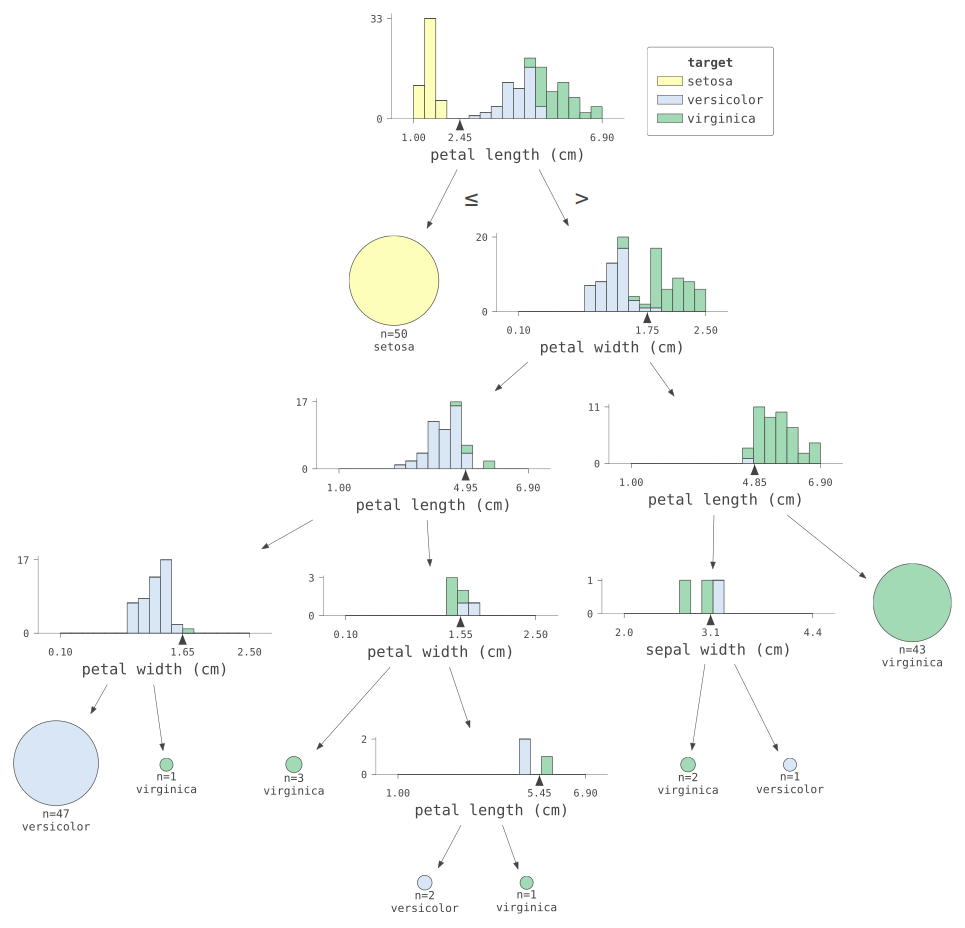

In [53]:
import dtreeviz # https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb

viz_model = dtreeviz.model(tree_clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz_model.view(fontname="monospace", scale=1.7)

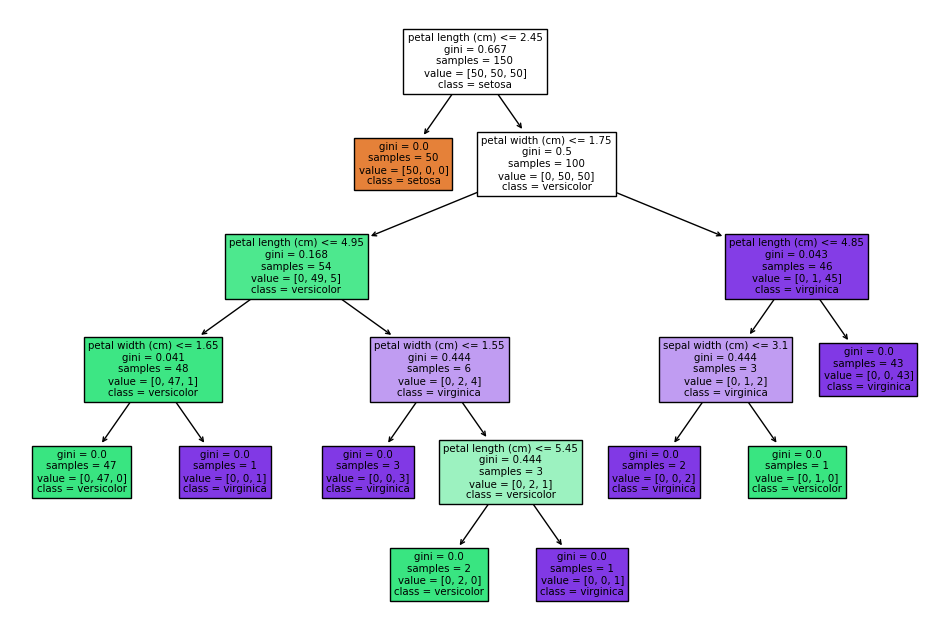

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8)) # Incrementamos el tamaño de la figura
plot_tree(tree_clf,
        feature_names=iris.feature_names,
        class_names=list(iris.target_names),
        filled=True)
plt.show()

## Árboles de decisión para regresión

Los árboles de decisión se pueden usar para tareas de clasificación y regresión. Estas dos categorías de problemas se diferencian en la naturaleza de la variable objetivo. En el caso de la clasificación, la variable objetivo es categórica, mientras que en el caso de la regresión, la variable objetivo es numérica o continua.

Si bien los árboles de decisión para la clasificación se construyen de la misma manera que los árboles de decisión para la regresión, la forma en que se realiza la predicción es diferente. En el caso de la clasificación, la predicción se realiza asignando la clase más frecuente en el nodo terminal. **En el caso de la regresión, la predicción se realiza calculando el promedio de las observaciones en el conjunto de entrenamiento** que pertenecen al mismo nodo terminal.

Los árboles de regresión dividen los datos de salida continuos en intervalos discretos.

Vamos a realizar una regresión con un árbol de decisión sobre el mismo conjunto de datos que usamos en el notebook de regresión lineal.

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("data/salaries.csv")

tree_reg = DecisionTreeRegressor(max_depth=3).fit(df[["YearsExperience"]], df["Salary"])

/home/avidaldo/miniconda3/envs/env5/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


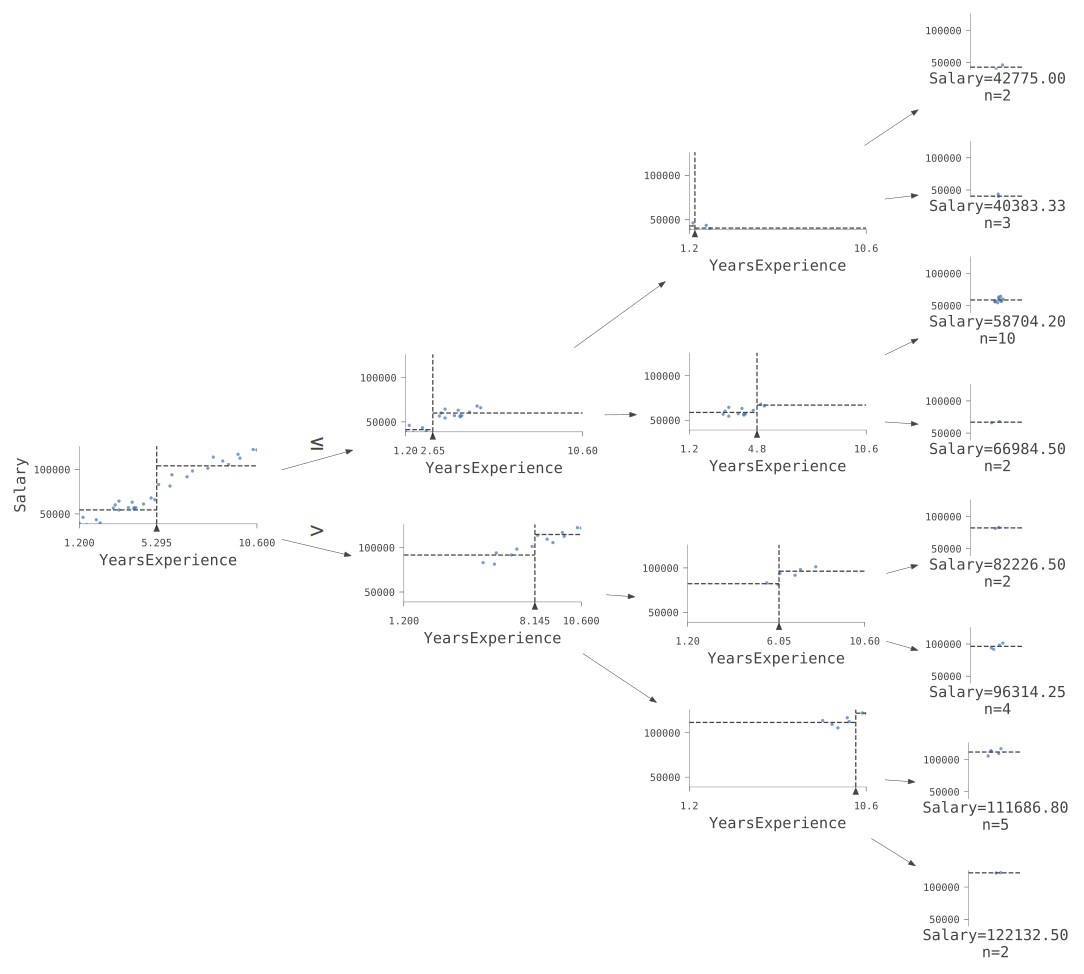

In [56]:
viz_model = dtreeviz.model(tree_reg, df[["YearsExperience"]], df["Salary"], target_name="Salary", feature_names=["YearsExperience"])
viz_model.view(fontname="monospace", scale=1.7, orientation="LR")

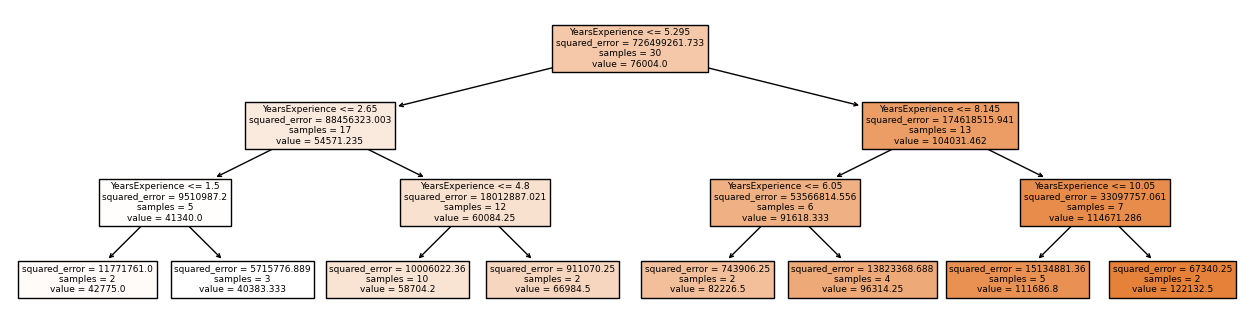

In [57]:
plt.figure(figsize=(16, 4)) # Uso matplotlib para definir el tamaño de la figura
_ = plot_tree(tree_reg, filled=True, feature_names=["YearsExperience"])

## Comparación con regresión lineal y *overfitting*

Si aplicamos un arbol de regresión al mismo conjunto de datos que usamos para la regresión lineal, podemos observar que el árbol de regresión se ajusta mucho mejor a los datos. Esto se debe a que el árbol de regresión es capaz de capturar relaciones no lineales entre las características de entrada y la variable objetivo, el problema de eso es que tiende a [**sobreajustar**]() los datos.

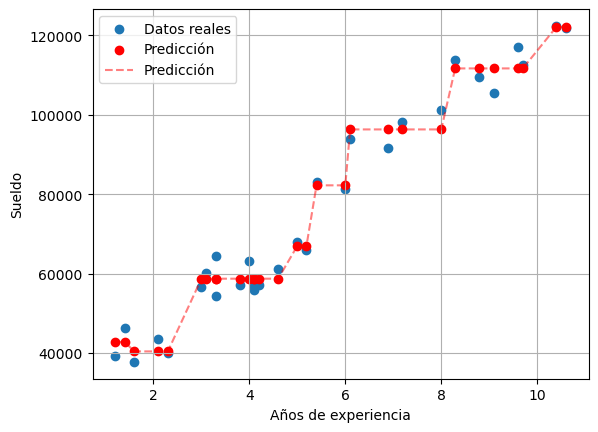

In [58]:
plt.scatter(df['YearsExperience'], df['Salary'], label='Datos reales')
df = df.sort_values(by=['YearsExperience'])
y_pred = tree_reg.predict(df[['YearsExperience']])
plt.scatter(df['YearsExperience'], y_pred, color='red', label='Predicción')
plt.plot(df['YearsExperience'], y_pred, color='red', label='Predicción', linestyle='--', alpha=0.5)
plt.xlabel('Años de experiencia')
plt.ylabel('Sueldo')
plt.legend()
plt.grid(True)
plt.show()

Si creamos muchos puntos en el rango en que estamos prediciendo:

/home/avidaldo/miniconda3/envs/env5/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


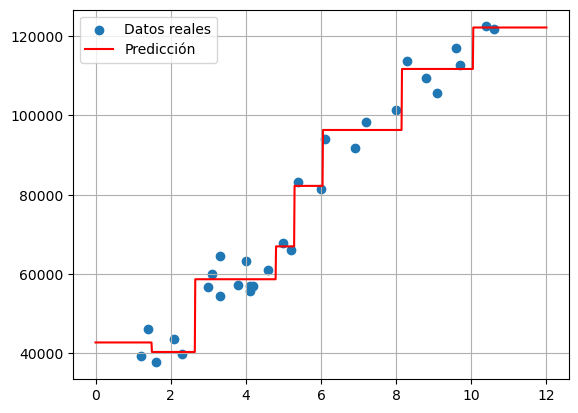

In [59]:
import numpy as np

plt.scatter(df['YearsExperience'], df['Salary'], label='Datos reales')
x = np.linspace(0, 12, 1000)
y_pred = tree_reg.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='red', label='Predicción')
plt.legend()
plt.grid(True)
plt.show()

Podemos observar fácilmente una de las principales desventajas de los árboles de decisión: su tendencia a sobreajustar los datos (***overfitting***). Los árboles de decisión tienden a tener una alta varianza y, por lo tanto, a sobreajustar los datos. Esto se puede mitigar mediante la poda del árbol, la limitación de la profundidad del árbol, la limitación del número de nodos hoja o la limitación del número de nodos hoja. De hecho hemos usado un árbol de decisión con una profundidad máxima de solo 3. Veamos lo que sucede si usamos un árbol de decisión sin limitar su profundidad.

/home/avidaldo/miniconda3/envs/env5/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


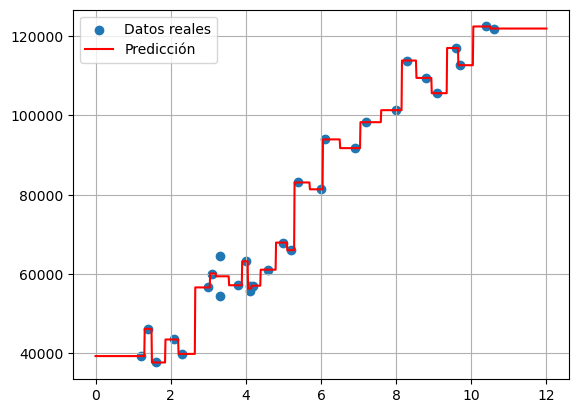

In [60]:
tree_reg = DecisionTreeRegressor().fit(df[["YearsExperience"]], df["Salary"])

plt.scatter(df['YearsExperience'], df['Salary'], label='Datos reales')
x = np.linspace(0, 12, 1000)
y_pred = tree_reg.predict(x.reshape(-1, 1))
plt.plot(x, y_pred, color='red', label='Predicción')
plt.legend()
plt.grid(True)
plt.show()

El árbol de decisión continua haciendo divisiones hasta que cada hoja tiene una única muestra. Esto es un claro ejemplo de sobreajuste. Puede llamarnos la atención, sin embargo, que hay algunas muestras que no coinciden con su predicción (entre 3 y 4 claramente y podemos intuir otro caso poco después de 4). Esto se debe a que esa muestras están exactamente en el mismo valor predictor, con lo que el árbol de decisión se ve obligado a hacer la media. Confirmemos en qué casos se produce esto:

In [61]:
df['YearsExperience'].value_counts().loc[lambda x: x>1]

# o lo que es lo mismo:
xs_repe = df['YearsExperience'].value_counts()
xs_repe.loc[xs_repe > 1]  


YearsExperience
4.1    2
3.3    2
Name: count, dtype: int64

## Fuentes
- https://cienciadedatos.net/documentos/py07_arboles_decision_python
- https://www.youtube.com/watch?v=g9c66TUylZ4
- https://insidelearningmachines.com/advantages_and_disadvantages_of_decision_trees/